Question 1: Implementing Linear Regression <br>

Description:<br>
Implement a simple linear regression model using Python and scikit-learn to predict house prices based on one feature: the size of the house.

Generated synthetic dataset.

Generated/Loaded dataset sample:
     Size_sqft          Price
0  1623.988261  296209.651267
1  2891.571474  474765.500601
2  2410.386672  414310.824094
3  2117.048665  307930.232347
4  1143.241009  214895.994711

Dataset shape: (100, 2)

Feature 'Size_sqft' (X) data type: float64
Target 'Price' (y) data type: float64

Training data shape: X_train=(80, 1), y_train=(80,)
Testing data shape: X_test=(20, 1), y_test=(20,)

--- Model Training Complete ---
Model Intercept (c): 58665.79
Model Coefficient (m - price per sqft): 144.53

--- Model Evaluation ---
Mean Absolute Error (MAE): $17,740.28
Mean Squared Error (MSE): $588,329,562.35
Root Mean Squared Error (RMSE): $24,255.51
R-squared (R²): 0.9412


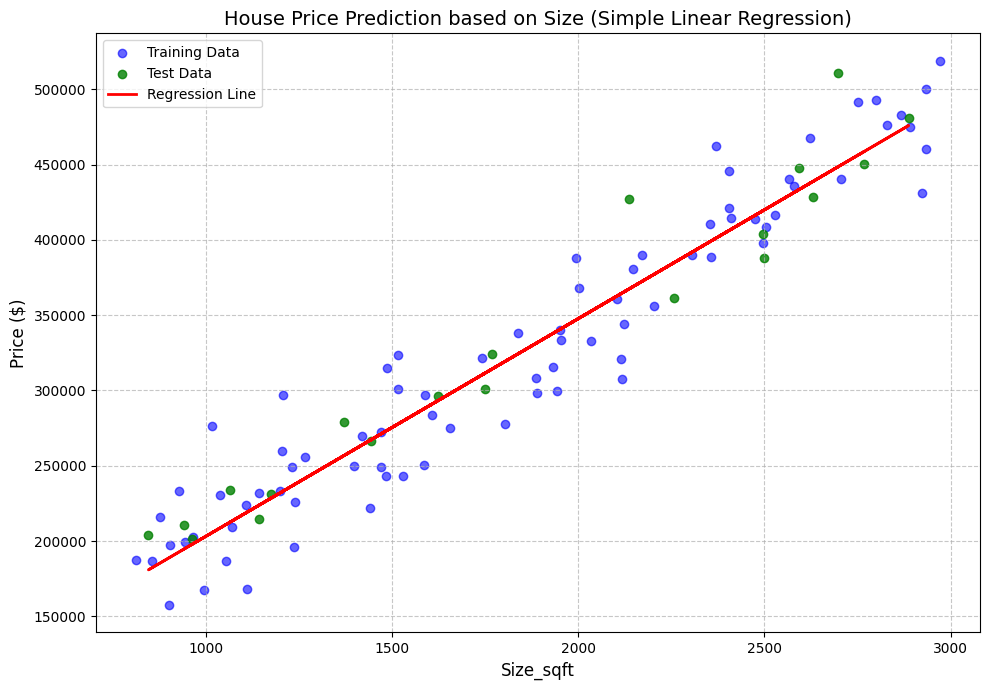


Predicted price for a 1800 sq. ft. house: $318,814.41


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
# Write your code from here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.exceptions import NotFittedError
import os # For checking file existence

# --- Configuration ---
# Set this to True if you want to use a real CSV file.
# If False, synthetic data will be generated.
USE_REAL_DATA = False
REAL_DATA_PATH = 'your_house_data.csv' # ONLY if USE_REAL_DATA is True
SIZE_COLUMN_NAME = 'Size_sqft'       # Replace with your actual size column name if using real data
PRICE_COLUMN_NAME = 'Price'          # Replace with your actual price column name if using real data

# --- 1. Data Loading or Generation ---
df = None
try:
    if USE_REAL_DATA:
        if not os.path.exists(REAL_DATA_PATH):
            raise FileNotFoundError(f"The specified data file was not found: {REAL_DATA_PATH}")
        df = pd.read_csv(REAL_DATA_PATH)
        print(f"Successfully loaded data from '{REAL_DATA_PATH}'.")

        # Basic check for required columns
        if SIZE_COLUMN_NAME not in df.columns:
            raise ValueError(f"Required column '{SIZE_COLUMN_NAME}' not found in the dataset.")
        if PRICE_COLUMN_NAME not in df.columns:
            raise ValueError(f"Required column '{PRICE_COLUMN_NAME}' not found in the dataset.")

    else:
        np.random.seed(42) # for reproducibility
        house_size = np.random.uniform(800, 3000, 100).reshape(-1, 1)
        price_per_sqft = 150
        base_price = 50000
        noise = np.random.normal(0, 30000, 100).reshape(-1, 1)
        house_price = (house_size * price_per_sqft) + base_price + noise
        df = pd.DataFrame({SIZE_COLUMN_NAME: house_size.flatten(), PRICE_COLUMN_NAME: house_price.flatten()})
        print("Generated synthetic dataset.")

    print("\nGenerated/Loaded dataset sample:")
    print(df.head())
    print("\nDataset shape:", df.shape)

except FileNotFoundError as e:
    print(f"Error loading data: {e}. Please check your 'REAL_DATA_PATH'.")
    exit() # Exit if data cannot be loaded
except pd.errors.EmptyDataError:
    print(f"Error: The file '{REAL_DATA_PATH}' is empty or contains no data.")
    exit()
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file '{REAL_DATA_PATH}': {e}.")
    print("Please check for malformed CSV, incorrect delimiter, or encoding issues.")
    exit()
except ValueError as e:
    print(f"Data preparation error: {e}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")
    exit()

# --- 2. Data Preparation and Type Validation ---
try:
    X = df[[SIZE_COLUMN_NAME]] # Features (independent variable)
    y = df[PRICE_COLUMN_NAME]  # Target (dependent variable)

    # Validate that features and target are numerical
    if not pd.api.types.is_numeric_dtype(X[SIZE_COLUMN_NAME]):
        raise TypeError(f"Feature column '{SIZE_COLUMN_NAME}' is not numeric ({X[SIZE_COLUMN_NAME].dtype}). Please ensure it contains only numbers.")
    if not pd.api.types.is_numeric_dtype(y):
        raise TypeError(f"Target column '{PRICE_COLUMN_NAME}' is not numeric ({y.dtype}). Please ensure it contains only numbers.")

    # Handle potential NaN values in selected columns by dropping rows for simplicity
    # For real applications, consider imputation (mean, median, etc.)
    original_rows = df.shape[0]
    df_cleaned = df.dropna(subset=[SIZE_COLUMN_NAME, PRICE_COLUMN_NAME])
    rows_dropped = original_rows - df_cleaned.shape[0]
    if rows_dropped > 0:
        print(f"\nDropped {rows_dropped} rows with missing values in '{SIZE_COLUMN_NAME}' or '{PRICE_COLUMN_NAME}'.")
        X = df_cleaned[[SIZE_COLUMN_NAME]]
        y = df_cleaned[PRICE_COLUMN_NAME]

    if X.empty or y.empty:
        raise ValueError("After cleaning, feature or target data is empty. Cannot proceed with training.")

    print(f"\nFeature '{SIZE_COLUMN_NAME}' (X) data type: {X[SIZE_COLUMN_NAME].dtype}")
    print(f"Target '{PRICE_COLUMN_NAME}' (y) data type: {y.dtype}")

except TypeError as e:
    print(f"Data type error: {e}")
    exit()
except ValueError as e:
    print(f"Data preparation error: {e}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during data preparation: {e}")
    exit()

# --- 3. Split Data into Training and Testing Sets ---
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")
except Exception as e:
    print(f"Error during data splitting: {e}")
    exit()

# --- 4. Create and Train the Linear Regression Model ---
model = LinearRegression()
try:
    model.fit(X_train, y_train)
    print("\n--- Model Training Complete ---")
    print(f"Model Intercept (c): {model.intercept_:.2f}")
    print(f"Model Coefficient (m - price per sqft): {model.coef_[0]:.2f}")
except Exception as e:
    print(f"Error during model training: {e}")
    exit()

# --- 5. Make Predictions on the Test Set ---
y_pred = None
try:
    y_pred = model.predict(X_test)
except NotFittedError:
    print("Error: Model has not been fitted yet. Cannot make predictions.")
    exit()
except Exception as e:
    print(f"Error during prediction: {e}")
    exit()

# --- 6. Evaluate the Model ---
try:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)

    print("\n--- Model Evaluation ---")
    print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"Mean Squared Error (MSE): ${mse:,.2f}")
    print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
    print(f"R-squared (R²): {r2:.4f}")
except Exception as e:
    print(f"Error during model evaluation: {e}")

# --- 7. Visualize the Results ---
try:
    plt.figure(figsize=(10, 7))

    # Plot training data
    plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)
    # Plot test data
    plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.8)
    # Plot the regression line
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

    plt.title('House Price Prediction based on Size (Simple Linear Regression)', fontsize=14)
    plt.xlabel(f'{SIZE_COLUMN_NAME}', fontsize=12)
    plt.ylabel(f'{PRICE_COLUMN_NAME} ($)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error during plotting: {e}")

# --- Example Prediction (Optional) ---
try:
    new_house_size = np.array([[1800]]) # A new house size for prediction
    predicted_price = model.predict(new_house_size)
    print(f"\nPredicted price for a {new_house_size[0,0]} sq. ft. house: ${predicted_price[0]:,.2f}")
except NotFittedError:
    print("\nCannot make example prediction: Model was not successfully fitted.")
except Exception as e:
    print(f"\nError during example prediction: {e}")

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Notebook Initialization Complete.
----------------------------------------------------------------------------------------------------
INFO: Generated synthetic dataset for house prices.
INFO: Assumption: House price is linearly dependent on size, with some random noise.

Dataset sample (first 5 rows):
     Size_sqft          Price
0  1623.988261  296209.651267
1  2891.571474  474765.500601
2  2410.386672  414310.824094
3  2117.048665  307930.232347
4  1143.241009  214895.994711

Dataset shape: (100, 2) (rows, columns)

INFO: Feature 'Size_sqft' (X) data type: float64
INFO: Target 'Price' (y) data type: float64

INFO: Feature 'Size_sqft' has been scaled using StandardScaler.

INFO: Training data shape: X_train=(80, 1), y_train=(80,)
INFO: Testing data shape: X_test=(20, 1), y_test=(20,)

INFO: Linear Regression Model trained successfully.
INFO: Model Intercept (c): 323785.80
INFO: Model Coefficient (m - for scaled size): 94115.42

INFO: Predictions made on the test set.

--- Model Eval

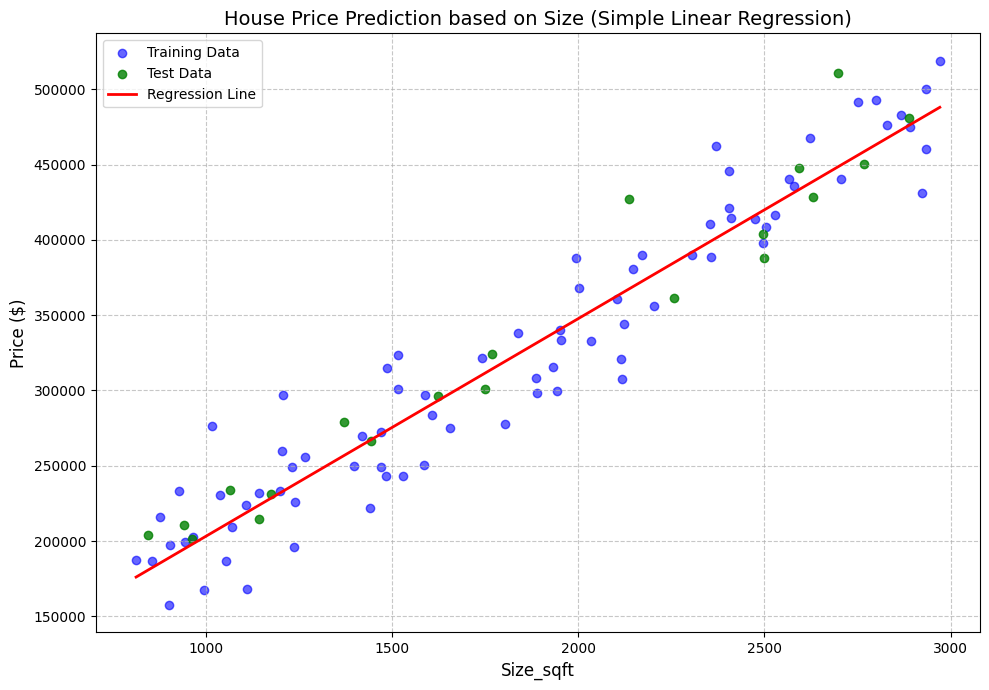


INFO: Predicted price for a 1800 sq. ft. house: $318,814.41

----------------------------------------------------------------------------------------------------


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.exceptions import NotFittedError
from sklearn.preprocessing import StandardScaler # Added for feature scaling
import os

# --- Configuration for the Notebook ---
# Set this to True if you want to use a real CSV file.
# If False, synthetic data will be generated.
USE_REAL_DATA = False
REAL_DATA_PATH = 'your_house_data.csv' # ONLY if USE_REAL_DATA is True (e.g., 'data/housing_prices.csv')
SIZE_COLUMN_NAME = 'Size_sqft'       # Replace with your actual size column name if using real data
PRICE_COLUMN_NAME = 'Price'          # Replace with your actual price column name if using real data

print("Notebook Initialization Complete.")
print("----------------------------------------------------------------------------------------------------")

# --- Function to encapsulate data loading and validation ---
def load_or_generate_data(use_real, path, size_col, price_col):
    """
    Loads data from a CSV or generates synthetic data.
    Performs initial validation for file existence and column presence.

    Args:
        use_real (bool): If True, attempts to load from `path`. Otherwise, generates synthetic data.
        path (str): The file path to the CSV dataset.
        size_col (str): The name of the column representing house size.
        price_col (str): The name of the column representing house price.

    Returns:
        pd.DataFrame: The loaded or generated DataFrame, or None if an error occurs.
    """
    df_result = None
    try:
        if use_real:
            if not os.path.exists(path):
                raise FileNotFoundError(f"ERROR: Data file not found at '{path}'. Please verify the path and filename.")
            df_result = pd.read_csv(path)
            print(f"INFO: Successfully loaded data from '{path}'.")

            if size_col not in df_result.columns:
                raise ValueError(f"ERROR: Required feature column '{size_col}' not found in the dataset.")
            if price_col not in df_result.columns:
                raise ValueError(f"ERROR: Required target column '{price_col}' not found in the dataset.")

        else:
            np.random.seed(42) # for reproducibility
            house_size = np.random.uniform(800, 3000, 100).reshape(-1, 1)
            price_per_sqft = 150
            base_price = 50000
            noise = np.random.normal(0, 30000, 100).reshape(-1, 1)
            house_price = (house_size * price_per_sqft) + base_price + noise
            df_result = pd.DataFrame({size_col: house_size.flatten(), price_col: house_price.flatten()})
            print("INFO: Generated synthetic dataset for house prices.")
            print("INFO: Assumption: House price is linearly dependent on size, with some random noise.")

        print("\nDataset sample (first 5 rows):")
        print(df_result.head())
        print(f"\nDataset shape: {df_result.shape} (rows, columns)")
        return df_result

    except FileNotFoundError as e:
        print(f"{e}")
    except pd.errors.EmptyDataError:
        print(f"ERROR: The file '{path}' is empty or contains no data.")
    except pd.errors.ParserError as e:
        print(f"ERROR: Failed to parse CSV file '{path}': {e}. Check for malformed CSV, delimiter, or encoding.")
    except ValueError as e:
        print(f"{e}")
    except Exception as e:
        print(f"CRITICAL ERROR during data loading/generation: {e}")
    return None # Return None if any error occurs

# --- 1. Data Loading or Generation ---
df_house = load_or_generate_data(USE_REAL_DATA, REAL_DATA_PATH, SIZE_COLUMN_NAME, PRICE_COLUMN_NAME)

if df_house is None:
    print("\nExiting: Data could not be loaded or generated successfully. Please resolve the errors above.")
else:
    # --- 2. Data Preparation and Type Validation ---
    try:
        X = df_house[[SIZE_COLUMN_NAME]] # Features (independent variable) - must be 2D
        y = df_house[PRICE_COLUMN_NAME]  # Target (dependent variable) - can be 1D

        # Validate that features and target are numerical
        if not pd.api.types.is_numeric_dtype(X[SIZE_COLUMN_NAME]):
            raise TypeError(f"ERROR: Feature column '{SIZE_COLUMN_NAME}' is not numeric ({X[SIZE_COLUMN_NAME].dtype}). Please ensure it contains only numbers.")
        if not pd.api.types.is_numeric_dtype(y):
            raise TypeError(f"ERROR: Target column '{PRICE_COLUMN_NAME}' is not numeric ({y.dtype}). Please ensure it contains only numbers.")

        # Handle potential NaN values by dropping rows (for simplicity in this model)
        # For more advanced imputation, consider median/mean imputation from previous tasks.
        original_rows = X.shape[0]
        # Create a combined dataframe for dropping NaNs to ensure X and y remain aligned
        combined_df_cleaned = pd.concat([X, y], axis=1).dropna()
        X_cleaned = combined_df_cleaned[[SIZE_COLUMN_NAME]]
        y_cleaned = combined_df_cleaned[PRICE_COLUMN_NAME]

        rows_dropped = original_rows - X_cleaned.shape[0]
        if rows_dropped > 0:
            print(f"\nINFO: Dropped {rows_dropped} rows with missing values in '{SIZE_COLUMN_NAME}' or '{PRICE_COLUMN_NAME}'.")

        if X_cleaned.empty or y_cleaned.empty:
            raise ValueError("ERROR: After cleaning, feature or target data is empty. Cannot proceed with training.")

        print(f"\nINFO: Feature '{SIZE_COLUMN_NAME}' (X) data type: {X_cleaned[SIZE_COLUMN_NAME].dtype}")
        print(f"INFO: Target '{PRICE_COLUMN_NAME}' (y) data type: {y_cleaned.dtype}")

        # --- Feature Scaling ---
        # Scaling is generally good practice for many ML models.
        # For simple linear regression with one feature, it primarily affects the coefficient's scale,
        # but is crucial for regularization or gradient-descent based models.
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_cleaned)
        print("\nINFO: Feature 'Size_sqft' has been scaled using StandardScaler.")

    except TypeError as e:
        print(f"{e}")
        X_scaled, y_cleaned = None, None
    except ValueError as e:
        print(f"{e}")
        X_scaled, y_cleaned = None, None
    except Exception as e:
        print(f"CRITICAL ERROR during data preparation: {e}")
        X_scaled, y_cleaned = None, None

    if X_scaled is not None and y_cleaned is not None:
        # --- 3. Split Data into Training and Testing Sets ---
        try:
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)
            print(f"\nINFO: Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
            print(f"INFO: Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")
        except Exception as e:
            print(f"ERROR: Error during data splitting: {e}")
            X_train, X_test, y_train, y_test = None, None, None, None

        if X_train is not None:
            # --- 4. Create and Train the Linear Regression Model ---
            model = LinearRegression()
            try:
                model.fit(X_train, y_train)
                print("\nINFO: Linear Regression Model trained successfully.")
                # Note: Coefficients are for the scaled feature
                print(f"INFO: Model Intercept (c): {model.intercept_:.2f}")
                print(f"INFO: Model Coefficient (m - for scaled size): {model.coef_[0]:.2f}")
            except Exception as e:
                print(f"ERROR: Error during model training: {e}")
                model = None # Set model to None if training fails

            if model is not None:
                # --- 5. Make Predictions on the Test Set ---
                y_pred = None
                try:
                    y_pred = model.predict(X_test)
                    print("\nINFO: Predictions made on the test set.")
                except NotFittedError:
                    print("ERROR: Model has not been fitted yet. Cannot make predictions.")
                except Exception as e:
                    print(f"ERROR: Error making predictions: {e}")

                if y_pred is not None:
                    # --- 6. Evaluate the Model ---
                    try:
                        mae = mean_absolute_error(y_test, y_pred)
                        mse = mean_squared_error(y_test, y_pred)
                        rmse = np.sqrt(mse) # Root Mean Squared Error
                        r2 = r2_score(y_test, y_pred)

                        print("\n--- Model Evaluation ---")
                        print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
                        print(f"Mean Squared Error (MSE): ${mse:,.2f}")
                        print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
                        print(f"R-squared (R²): {r2:.4f}")
                    except Exception as e:
                        print(f"ERROR: Error during model evaluation: {e}")

                    # --- 7. Visualize the Results ---
                    try:
                        plt.figure(figsize=(10, 7))

                        # To plot correctly, we need to inverse transform X_test
                        # or plot against the original X values from the test set
                        X_test_original_scale = scaler.inverse_transform(X_test)
                        X_train_original_scale = scaler.inverse_transform(X_train)

                        # Plot training data
                        plt.scatter(X_train_original_scale, y_train, color='blue', label='Training Data', alpha=0.6)
                        # Plot test data
                        plt.scatter(X_test_original_scale, y_test, color='green', label='Test Data', alpha=0.8)

                        # To plot the regression line, predict on a range of original X values
                        # and then transform them for the model
                        X_plot_original = np.linspace(X_cleaned[SIZE_COLUMN_NAME].min(), X_cleaned[SIZE_COLUMN_NAME].max(), 100).reshape(-1, 1)
                        X_plot_scaled = scaler.transform(X_plot_original)
                        y_plot_pred = model.predict(X_plot_scaled)

                        plt.plot(X_plot_original, y_plot_pred, color='red', linewidth=2, label='Regression Line')

                        plt.title('House Price Prediction based on Size (Simple Linear Regression)', fontsize=14)
                        plt.xlabel(f'{SIZE_COLUMN_NAME}', fontsize=12)
                        plt.ylabel(f'{PRICE_COLUMN_NAME} ($)', fontsize=12)
                        plt.legend()
                        plt.grid(True, linestyle='--', alpha=0.7)
                        plt.tight_layout()
                        plt.show()

                    except Exception as e:
                        print(f"ERROR: Error during plotting: {e}")

                    # --- 8. Example Prediction (Optional) ---
                    try:
                        # Predict for a new house size (e.g., 1800 sq. ft.)
                        new_house_size_original = np.array([[1800]])
                        # Remember to scale the new input before prediction
                        new_house_size_scaled = scaler.transform(new_house_size_original)
                        predicted_price = model.predict(new_house_size_scaled)
                        print(f"\nINFO: Predicted price for a {new_house_size_original[0,0]} sq. ft. house: ${predicted_price[0]:,.2f}")
                    except NotFittedError:
                        print("ERROR: Cannot make example prediction: Model was not successfully fitted.")
                    except Exception as e:
                        print(f"ERROR: Error during example prediction: {e}")
                else:
                    print("\nSkipping evaluation and visualization due to prediction error.")
            else:
                print("\nSkipping prediction, evaluation, and visualization as model training failed.")
        else:
            print("\nSkipping model training and subsequent steps due to data splitting error.")
    else:
        print("\nSkipping data splitting, training, and subsequent steps due to data preparation error.")

print("\n----------------------------------------------------------------------------------------------------")